In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import subprocess
%matplotlib inline

In [2]:
# Read csv file, convert time to datetime data type
df = pd.read_csv("flex_networks.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], infer_datetime_format=True)

<AxesSubplot:xlabel='Timestamp'>

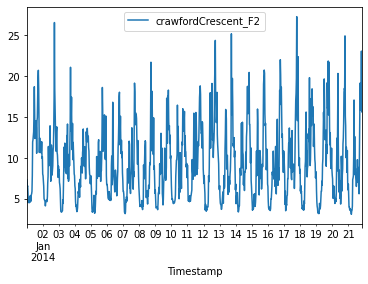

In [3]:
# Plot of example load
df.iloc[0:1000].plot(x="Timestamp", y="crawfordCrescent_F2")
#plt.savefig("test", dpi=100)


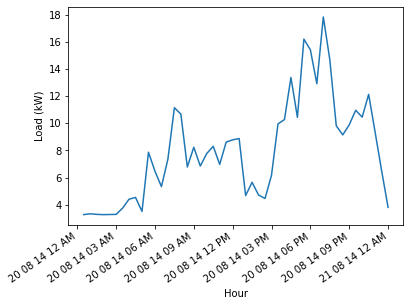

In [4]:
d = 231

fig, ax = plt.subplots()
ax.plot(df["Timestamp"].iloc[(48*d):48+(48*d)], df["crawfordCrescent_F2"].iloc[(48*d):48+(48*d)])

for label in ax.get_xticklabels(which='major'):
    label.set(rotation=35, horizontalalignment='right')

myFmt = mdates.DateFormatter('%d %m %y %I %p')  #'%d %m %y %I %p'
ax.xaxis.set_major_formatter(myFmt)


ax.set_ylabel("Load (kW)")
ax.set_xlabel("Hour")

#plt.tight_layout()
plt.savefig("example_load.svg", format='svg', dpi=1500, bbox_inches="tight")

In [5]:
# Calculate total load
df["load_total"] = df.iloc[:, :22].sum(axis=1)
# Persistance forcast, shift total by a week (48 * 7 = 336)
df["pers_forecast"] = df["load_total"].shift(336, axis=0)

In [6]:
times = df['Timestamp']
DoW = []
HoD = []
MoY = []

for x in times:
    DoW.append(x.weekday())
    HoD.append(x.hour)
    MoY.append(x.month)

df['DoW'] = DoW
df['HoD'] = HoD
df['MoY'] = MoY


In [7]:
allMonthsMean = []
for i in range(1,13):
    month = []
    for j in df.index:
        if df["MoY"][j] == i:
            month.append(df["load_total"][j])
    allMonthsMean.append(np.mean(month))
# allMonths = np.asarray(allMonths)

# monthAvg = np.mean(allMonths)

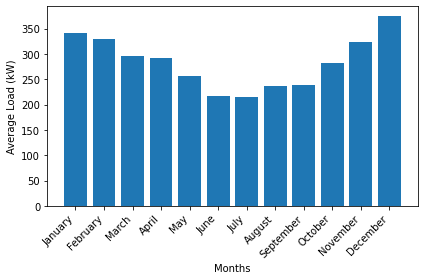

In [8]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"] 

fig, ax = plt.subplots()
ax.bar(months,allMonthsMean)

for label in ax.get_xticklabels(which='major'):
    label.set(rotation=45, horizontalalignment='right')

ax.set_ylabel("Average Load (kW)")
ax.set_xlabel("Months")

plt.tight_layout()
plt.savefig("average_months_load.svg", format='svg', dpi=1500, bbox_inches="tight")


In [26]:
# for i in range(1,13):
#     month = []
#     for j in df.index:
#         if df["MoY"][j] == i:
#             month.append(df["load_total"][j])
#     allMonthsMean.append(np.mean(month))

peakHours = []
nonPeakHours =[]

for i in df.index:
    if df["Timestamp"][i].hour >= 4 and df["Timestamp"][i].hour <= 18:
        peakHours.append(df["crawfordCrescent_F3"][i])
    else:
        nonPeakHours.append(df["crawfordCrescent_F3"][i])

peakHours = np.asarray(peakHours)
nonPeakHours = np.asarray(nonPeakHours)

print(np.var(peakHours))
print(np.var(nonPeakHours))



78.8011748360635
105.44225641887314


In [27]:
df["Timestamp"][19].hour

10

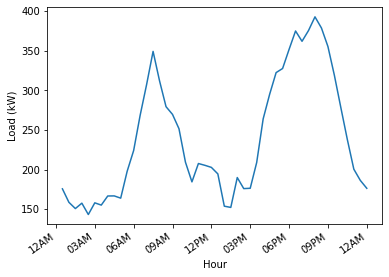

In [28]:
l = 336+(48*2)   # Begnning of graphed data, one week in
h = 336+(48*3)  # Last value of graphed data

fig, ax = plt.subplots()
ax.plot(df["Timestamp"].iloc[(48*d):48+(48*d)], df["load_total"].iloc[(48*d):48+(48*d)])
#ax.plot(df["Timestamp"].iloc[l:h], df["pers_forecast"].iloc[l:h])
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=35, horizontalalignment='right')

myFmt = mdates.DateFormatter('%I%p')  #'%d %m %y %I %p'
ax.xaxis.set_major_formatter(myFmt)

ax.set_ylabel("Load (kW)")
ax.set_xlabel("Hour")

#plt.tight_layout()
plt.savefig("example_load_allFeeders.svg", format='svg', dpi=1500, bbox_inches="tight")


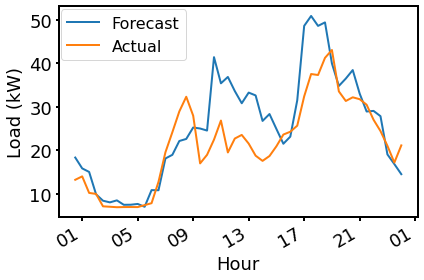

In [29]:
df['crawford_pers_forecast'] = df['crawfordCrescent_F3'].shift(336, axis=0)

fig, ax = plt.subplots()
ax.plot(df["Timestamp"].iloc[l:h], df["crawford_pers_forecast"].iloc[l:h], label="Forecast",linewidth=2)
ax.plot(df["Timestamp"].iloc[l:h], df["crawfordCrescent_F3"].iloc[l:h], label="Actual",linewidth=2)
xloc = mdates.HourLocator(interval=4)
ax.xaxis.set_major_locator(xloc)
#ax.grid(True)
# Set labels to day number - month name
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax.set_ylabel("Load (kW)", fontsize=18)
ax.set_xlabel("Hour", fontsize=18)

#ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)
# for axis in ['top','right']:
#   ax.spines[axis].set_linewidth(0)
ax.tick_params(width=2)
# ax.set_xlim([-20, 20])
# ax.set_ylim([-5, 50])
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
fig.legend(loc=2, bbox_to_anchor=(0.13,0.98), prop={'size': 16})

fig.set_figheight(4)
fig.set_figwidth(6)

plt.tight_layout()
plt.savefig("pers_forecast.svg", format='svg', dpi=1500, bbox_inches="tight")
plt.show()

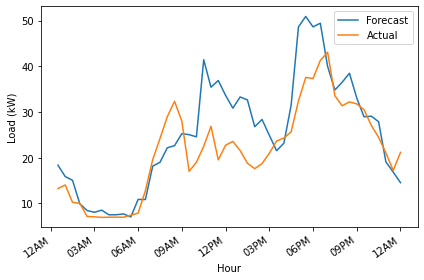

In [30]:
d = 9

fig, ax = plt.subplots()
ax.plot(df["Timestamp"].iloc[(48*d):48+(48*d)], df["crawford_pers_forecast"].iloc[(48*d):48+(48*d)], label="Forecast")
ax.plot(df["Timestamp"].iloc[(48*d):48+(48*d)], df["crawfordCrescent_F3"].iloc[(48*d):48+(48*d)], label="Actual")
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=35, horizontalalignment='right')

myFmt = mdates.DateFormatter('%I%p')  #'%d %m %y %I %p'
ax.xaxis.set_major_formatter(myFmt)

ax.set_ylabel("Load (kW)")
ax.set_xlabel("Hour")

ax.legend()

plt.tight_layout()
plt.savefig("persistanceForecast.svg", format='svg', dpi=1500, bbox_inches="tight")

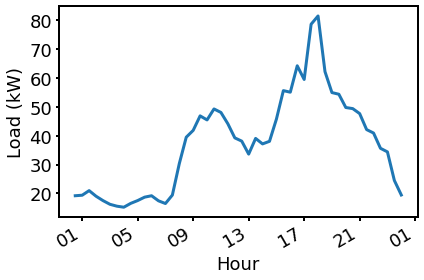

In [12]:
y = list(range(48))
day = 347

fig, ax = plt.subplots()
ax.plot(df["Timestamp"].iloc[day*48:day*48 + 48], df["hallowhill_F1"].iloc[day*48:day*48 + 48], linewidth=3)

xloc = mdates.HourLocator(interval=4)
ax.xaxis.set_major_locator(xloc)
#ax.grid(True)
# Set labels to day number - month name
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax.set_ylabel("Load (kW)", fontsize=18)
ax.set_xlabel("Hour", fontsize=18)

#ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)
# for axis in ['top','right']:
#   ax.spines[axis].set_linewidth(0)
ax.tick_params(width=2)
# ax.set_xlim([-20, 20])
# ax.set_ylim([-5, 50])
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

fig.set_figheight(4)
fig.set_figwidth(6)

plt.tight_layout()
plt.savefig("example_load.svg", format='svg', dpi=1500, bbox_inches="tight")
plt.show()

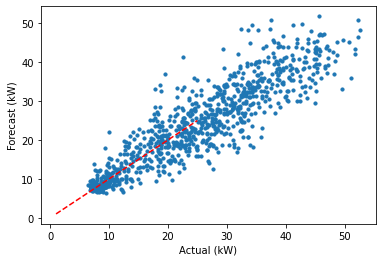

In [32]:
h=1344
plt.scatter(df["crawfordCrescent_F3"].iloc[l:h], df["crawford_pers_forecast"].iloc[l:h],s=10)
plt.plot([1,25], [1,25], c="r",ls="--")
plt.xlabel("Actual (kW)")
plt.ylabel("Forecast (kW)")
plt.savefig("linear.jpg", dpi=300)
plt.show()

In [33]:
# Calculate mean absolute error
error = df["crawford_pers_forecast"].iloc[l:h] - df["crawfordCrescent_F3"].iloc[l:h]
MAE = sum(abs(error)) / (h - l)
# Calculate mean absolute percentage error
MAPE = (100 / (h - l)) * sum(abs(error / df["crawfordCrescent_F3"].iloc[l:h]))

y_true = df["crawfordCrescent_F3"].iloc[7247:8687]
y_pred = df["crawford_pers_forecast"].iloc[7247:8687]

print(MAE)
print(mean_absolute_error(y_true, y_pred))
print(MAPE)
print(mean_absolute_percentage_error(y_true, y_pred))

3.7925171783625693
3.159155624999999
16.40769159786987
0.19358471712869776


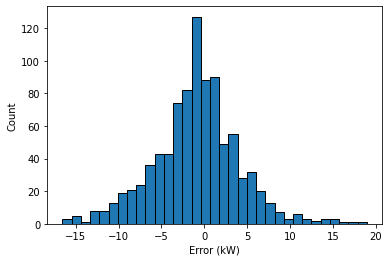

In [34]:
# Histogram of errors
plt.hist(error, bins='auto', edgecolor='black', linewidth=1)
plt.xlabel("Error (kW)")
plt.ylabel("Count")
plt.savefig("hist.jpg", dpi=300)
plt.show()

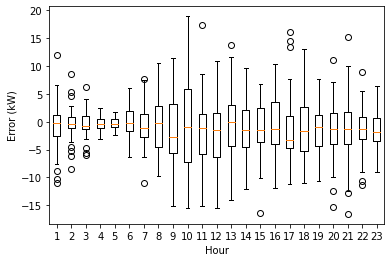

In [36]:
box_data =[]

for i in range(1,24):
    x = error.values[i*2::48]
    y = error.values[i*2-1::48]
    box_data.append(np.concatenate((x,y)))


plt.boxplot(box_data)
plt.xlabel("Hour")
plt.ylabel("Error (kW)")
plt.savefig("persistenseBoxplot.svg", format='svg', dpi=1500, bbox_inches="tight")
plt.show()
